<a href="https://colab.research.google.com/github/jonesLevin/Machine-Learning/blob/main/Computer_Vision_and_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Computer Vision and Convolutional Neural Networks with TensorFlow

## Get the Data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2022-11-28 07:28:18--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.197.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  58.7MB/s    in 1.8s    

2022-11-28 07:28:20 (58.7 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



 ## Inspecting the Data (Become One With The Data)

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
# Get the class names programmatically
import pathlib
import numpy as np

In [ ]:
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # Create a list of class names from the subdir

In [ ]:
print(class_names)

['pizza' 'steak']


In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

In [ ]:
def view_random_image(target_dir, target_class):
  # Setup the target directory
  target_folder = target_dir + target_class

  # Get random path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');

  print(f'Image shape: {img.shape}')
  
  return img

Image shape: (512, 341, 3)


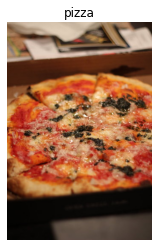

In [ ]:
# View a random image
img = view_random_image(target_dir='pizza_steak/train/', target_class='pizza')

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 341, 3), dtype=uint8, numpy=
array([[[181, 157, 131],
        [184, 160, 134],
        [187, 163, 137],
        ...,
        [ 35,  20,  13],
        [ 34,  19,  12],
        [ 34,  19,  12]],

       [[174, 150, 124],
        [177, 153, 127],
        [180, 156, 130],
        ...,
        [ 35,  20,  13],
        [ 34,  19,  12],
        [ 34,  19,  12]],

       [[165, 139, 114],
        [168, 142, 117],
        [172, 146, 121],
        ...,
        [ 35,  20,  13],
        [ 34,  19,  12],
        [ 34,  19,  12]],

       ...,

       [[  7,   6,   4],
        [  7,   6,   4],
        [  7,   6,   4],
        ...,
        [ 55,  45,  36],
        [ 55,  45,  36],
        [ 54,  44,  35]],

       [[  7,   6,   4],
        [  7,   6,   4],
        [  7,   6,   4],
        ...,
        [ 55,  45,  36],
        [ 54,  44,  35],
        [ 54,  44,  35]],

       [[  7,   6,   4],
        [  7,   6,   4],
        [  7,   6,   4],
        ...,
        [ 55,  45,  3

In [ ]:
img.shape # returns width, height and colour channels

(512, 341, 3)

In [ ]:
img/255.

array([[[0.70980392, 0.61568627, 0.51372549],
        [0.72156863, 0.62745098, 0.5254902 ],
        [0.73333333, 0.63921569, 0.5372549 ],
        ...,
        [0.1372549 , 0.07843137, 0.05098039],
        [0.13333333, 0.0745098 , 0.04705882],
        [0.13333333, 0.0745098 , 0.04705882]],

       [[0.68235294, 0.58823529, 0.48627451],
        [0.69411765, 0.6       , 0.49803922],
        [0.70588235, 0.61176471, 0.50980392],
        ...,
        [0.1372549 , 0.07843137, 0.05098039],
        [0.13333333, 0.0745098 , 0.04705882],
        [0.13333333, 0.0745098 , 0.04705882]],

       [[0.64705882, 0.54509804, 0.44705882],
        [0.65882353, 0.55686275, 0.45882353],
        [0.6745098 , 0.57254902, 0.4745098 ],
        ...,
        [0.1372549 , 0.07843137, 0.05098039],
        [0.13333333, 0.0745098 , 0.04705882],
        [0.13333333, 0.0745098 , 0.04705882]],

       ...,

       [[0.02745098, 0.02352941, 0.01568627],
        [0.02745098, 0.02352941, 0.01568627],
        [0.02745098, 0

## An end-to-end example

Let's build a CNN to find patterns in our image data
 - Load image
 - Preprocess our images
 - Build a CNN to find patterns in our image
 - Fit our CNN

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Preprocess Data (Normalize the data)
train_datagen = ImageDataGenerator(rescale=1. / 255)
valid_datagen = ImageDataGenerator(rescale=1. / 255)

# Setup paths to our data directory
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

# Import data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, batch_size=32, target_size=(224, 224), class_mode='binary', seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir, batch_size=32, target_size=(224, 224), class_mode='binary', seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Build a CNN model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3, 
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')   
])

# Compile our CNN
model_1.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

history_1 = model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 20s 216ms/step - loss: 0.5938 - accuracy: 0.6887 - val_loss: 0.3934 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 11s 228ms/step - loss: 0.4360 - accuracy: 0.7973 - val_loss: 0.3525 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 10s 205ms/step - loss: 0.3989 - accuracy: 0.8333 - val_loss: 0.3663 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 10s 205ms/step - loss: 0.3846 - accuracy: 0.8300 - val_loss: 0.3286 - val_accuracy: 0.8900
Epoch 5/5
47/47 [==============================] - 10s 203ms/step - loss: 0.3387 - accuracy: 0.8607 - val_loss: 0.2849 - val_accuracy: 0.8960


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Build the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

# 2. Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics='accuracy')

# 3. Fit the model
history_3 = model_3.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 10s 193ms/step - loss: 4.0871 - accuracy: 0.6113 - val_loss: 1.0506 - val_accuracy: 0.6660
Epoch 2/5
47/47 [==============================] - 9s 185ms/step - loss: 1.0450 - accuracy: 0.6727 - val_loss: 1.4081 - val_accuracy: 0.5120
Epoch 3/5
47/47 [==============================] - 9s 185ms/step - loss: 0.9833 - accuracy: 0.6913 - val_loss: 0.5000 - val_accuracy: 0.7640
Epoch 4/5
47/47 [==============================] - 9s 184ms/step - loss: 0.5990 - accuracy: 0.7607 - val_loss: 0.4413 - val_accuracy: 0.7960
Epoch 5/5
47/47 [==============================] - 9s 185ms/step - loss: 0.4833 - accuracy: 0.7800 - val_loss: 0.9481 - val_accuracy: 0.6440


In [ ]:
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 100)               15052900  
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Binary Classification: Breaking it down

1. Become one with the data
2. Preprocess the data
3. Create the model (start with baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model



  ### 1. Become one with the data

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


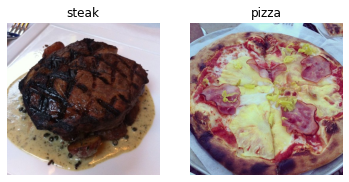

In [ ]:
# Visualize the data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1, 2, 2)
pizza_img = view_random_image('pizza_steak/train/', 'pizza')

### 2. Preprocess the Data

In [ ]:
# Define directory dataset paths
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

Our next step is to turn our data into **batches**
A batch is a small subset of data

In [ ]:
# Create train and test data generators and rescale the data
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
train_data = train_datagen.flow_from_directory(directory=train_dir, target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir, target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


### Create a CNN model (Start with a baseline)

In [ ]:
from keras.optimizers import Adam
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from keras import Sequential

In [ ]:
# Create the model (baseline)
model_4 = Sequential()

model_4.add(Conv2D(filters=10, kernel_size=3, strides=1, activation='relu', padding='valid', input_shape=(224, 224, 3)))
model_4.add(Conv2D(10, 3, activation='relu'))
model_4.add(Conv2D(10, 3, activation='relu'))
model_4.add(Flatten())
model_4.add(Dense(1, activation='sigmoid'))

In [ ]:
model_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_2 (Flatten)         (None, 475240)            0         
                                                                 
 dense_5 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 208ms/step - loss: 1.5626 - accuracy: 0.6420 - val_loss: 0.5104 - val_accuracy: 0.8020
Epoch 2/5
47/47 [==============================] - 9s 201ms/step - loss: 0.4635 - accuracy: 0.8027 - val_loss: 0.4016 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 9s 202ms/step - loss: 0.3303 - accuracy: 0.8700 - val_loss: 0.3834 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 10s 203ms/step - loss: 0.2082 - accuracy: 0.9300 - val_loss: 0.4133 - val_accuracy: 0.8200
Epoch 5/5
47/47 [==============================] - 9s 201ms/step - loss: 0.0779 - accuracy: 0.9780 - val_loss: 0.5282 - val_accuracy: 0.7740


In [ ]:
model_4.evaluate(test_data)

16/16 [==============================] - 2s 140ms/step - loss: 0.5282 - accuracy: 0.7740


[0.5282403230667114, 0.7739999890327454]

### Evaluating the model

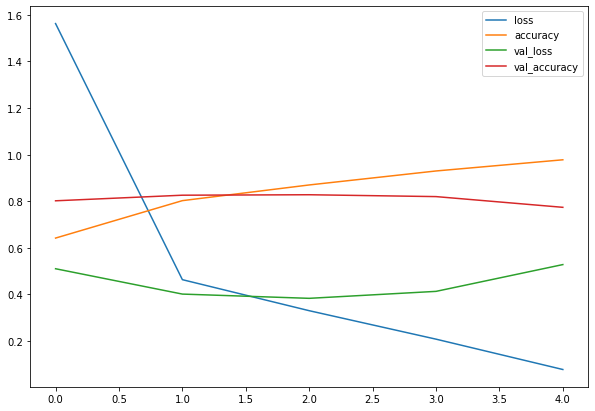

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [ ]:
# Plot the validation and training curves separetely
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

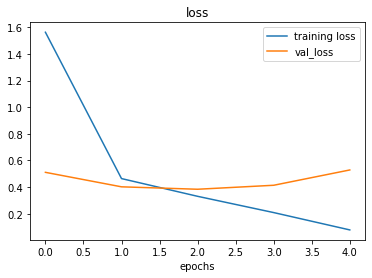

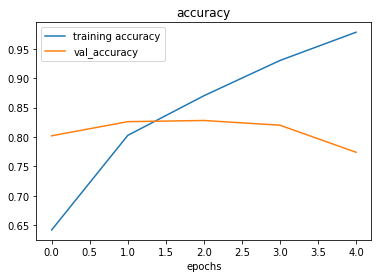

In [ ]:
# Check the loss and accuracy of model 4
plot_loss_curves(history_4)

### Adjusting the Model Parameters

Fitting a machine learning model comes in three steps:
1. Creating a baseline model
2. Beat the baseline by overfitting the base model
3. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers 
* Increase the number of conv filters
* Add another dense layer to the output of flattened layer

Ways to reduce overfitting:

* Add data augmentation
* Add regularization layers (such as MaxPool2d)
* Add more data...

In [ ]:
# Create the model (new baseline)
model_5 = Sequential()
model_5.add(Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)))
model_5.add(MaxPool2D(pool_size=2))
model_5.add(Conv2D(10, 3, activation='relu'))
model_5.add(MaxPool2D(pool_size=2))
model_5.add(Conv2D(10, 3, activation='relu'))
model_5.add(MaxPool2D(pool_size=2))
model_5.add(Flatten())
model_5.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data, 
                        epochs=5, 
                        steps_per_epoch=len(train_data), 
                        validation_data=test_data, 
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 199ms/step - loss: 0.6373 - accuracy: 0.6220 - val_loss: 0.5216 - val_accuracy: 0.7220
Epoch 2/5
47/47 [==============================] - 9s 193ms/step - loss: 0.4767 - accuracy: 0.7840 - val_loss: 0.3956 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 9s 193ms/step - loss: 0.4399 - accuracy: 0.7980 - val_loss: 0.3576 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 9s 192ms/step - loss: 0.4149 - accuracy: 0.8207 - val_loss: 0.3744 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 9s 192ms/step - loss: 0.3963 - accuracy: 0.8333 - val_loss: 0.3333 - val_accuracy: 0.8620


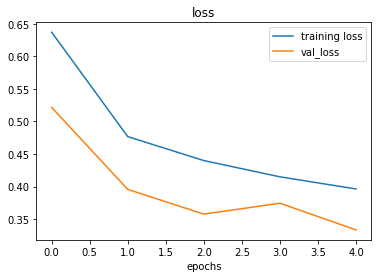

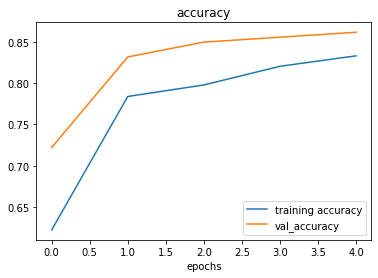

In [ ]:
# Plot loss curves
plot_loss_curves(history_5)

In [ ]:
# Get the summary of model 5
model_5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

### Finding Data Augmentation

In [ ]:
# Create ImageDataGenerator training instances 
train_datagen_augmented = ImageDataGenerator(rescale=1/255., 
                                             rotation_range=0.2, 
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

# Create image data gen without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create image data gen without data aug for test data
test_datagen = ImageDataGenerator(rescale=1/255.)

Data augmentation is the process of altering the training data, leading it to have more diversity and in turn allowing it to learn more generalizable patterns.

In [ ]:
# Import data and augment it from training dir
print('Augmented data')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                           target_size=(224, 224),
                                           batch_size=32,
                                           class_mode='binary',
                                           shuffle=False)

# Create non augment train data batches
print('Non augmented train data')
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Create non augmented test data batches
print('Non augmented test data')
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Augmented data
Found 1500 images belonging to 2 classes.
Non augmented train data
Found 1500 images belonging to 2 classes.
Non augmented test data
Found 500 images belonging to 2 classes.


In [ ]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

Showing image number: 7


(-0.5, 223.5, 223.5, -0.5)

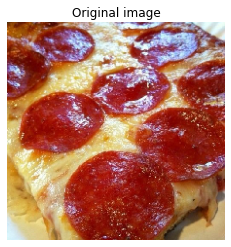

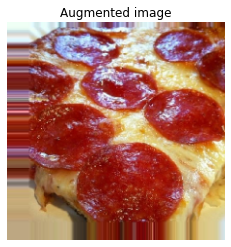

In [ ]:
# Show the original image and the augmented image
import random
random_number = random.randint(0, 32)
print(f'Showing image number: {random_number}')
plt.imshow(images[random_number])
plt.title('Original image')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title('Augmented image')
plt.axis(False)

In [ ]:
# Create a model (same as model_5)
model_6 = Sequential()
model_6.add(Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)))
model_6.add(MaxPool2D(pool_size=2))
model_6.add(Conv2D(10, 3, activation='relu'))
model_6.add(MaxPool2D(pool_size=2))
model_6.add(Conv2D(10, 3, activation='relu'))
model_6.add(MaxPool2D(pool_size=2))
model_6.add(Flatten())
model_6.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics='accuracy')

In [ ]:
# Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 479ms/step - loss: 0.7046 - accuracy: 0.4740 - val_loss: 0.6816 - val_accuracy: 0.5800
Epoch 2/5
47/47 [==============================] - 23s 493ms/step - loss: 0.6898 - accuracy: 0.5453 - val_loss: 0.6657 - val_accuracy: 0.5380
Epoch 3/5
47/47 [==============================] - 22s 474ms/step - loss: 0.6954 - accuracy: 0.4847 - val_loss: 0.6555 - val_accuracy: 0.6980
Epoch 4/5
47/47 [==============================] - 22s 467ms/step - loss: 0.6951 - accuracy: 0.6127 - val_loss: 0.6176 - val_accuracy: 0.6800
Epoch 5/5
47/47 [==============================] - 22s 467ms/step - loss: 0.6817 - accuracy: 0.6173 - val_loss: 0.6021 - val_accuracy: 0.7500


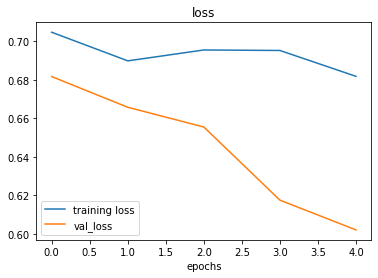

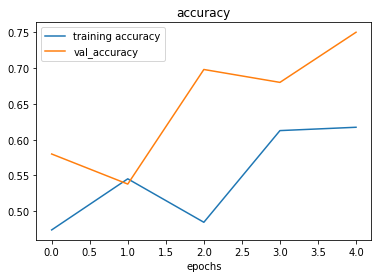

In [ ]:
# Check the models training curves
plot_loss_curves(history_6)

In [ ]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                           target_size=(224, 224),
                                           batch_size=32,
                                           class_mode='binary')

Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model
model_7 = Sequential()
model_7.add(Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)))
model_7.add(MaxPool2D(pool_size=2))
model_7.add(Conv2D(10, 3, activation='relu'))
model_7.add(MaxPool2D(pool_size=2))
model_7.add(Conv2D(10, 3, activation='relu'))
model_7.add(MaxPool2D(pool_size=2))
model_7.add(Flatten())
model_7.add(Dense(1, activation='sigmoid'))
 
# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics='accuracy')

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 475ms/step - loss: 0.6491 - accuracy: 0.6107 - val_loss: 0.5401 - val_accuracy: 0.7180
Epoch 2/5
47/47 [==============================] - 22s 474ms/step - loss: 0.5119 - accuracy: 0.7527 - val_loss: 0.3649 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 22s 468ms/step - loss: 0.5140 - accuracy: 0.7473 - val_loss: 0.3819 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 22s 467ms/step - loss: 0.4842 - accuracy: 0.7813 - val_loss: 0.4037 - val_accuracy: 0.8060
Epoch 5/5
47/47 [==============================] - 22s 471ms/step - loss: 0.4612 - accuracy: 0.7987 - val_loss: 0.4583 - val_accuracy: 0.7700


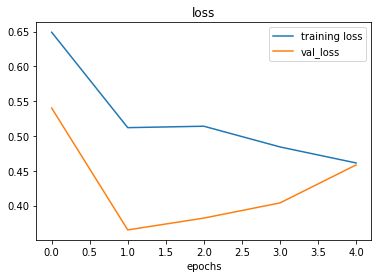

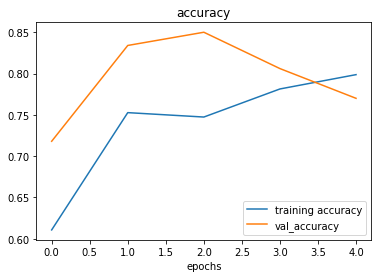

In [ ]:
# Plot the loss curves
plot_loss_curves(history_7)

## Making Predictions

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
def load_and_prep_image(filename, img_shape=224):
  # Read in file
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Resacle the image
  img = img / 255.
  return img

In [ ]:
# Load in and preprocess custom images
steak = load_and_prep_image('stk1.jpg')

In [ ]:
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.2567227 , 0.11267507, 0.00787518],
        [0.29488796, 0.12622534, 0.00084065],
        [0.2954044 , 0.1228554 , 0.0091299 ],
        ...,
        [0.10196079, 0.02745098, 0.        ],
        [0.08314038, 0.02821262, 0.        ],
        [0.07345928, 0.02247889, 0.        ]],

       [[0.2692752 , 0.11280637, 0.01071429],
        [0.30564556, 0.12943755, 0.00773763],
        [0.31751573, 0.14104517, 0.01947654],
        ...,
        [0.09803922, 0.03137255, 0.        ],
        [0.07920161, 0.02429965, 0.        ],
        [0.06953771, 0.01855732, 0.        ]],

       [[0.29048574, 0.12156863, 0.00905378],
        [0.31742823, 0.14095762, 0.01189757],
        [0.31127906, 0.13480845, 0.00539669],
        ...,
        [0.09803922, 0.03137255, 0.        ],
        [0.08457769, 0.02749396, 0.        ],
        [0.07633033, 0.01960784, 0.        ]],

       ...,

       [[0.51959985, 0.41371757, 0.29999208],
        [0.54

In [ ]:
model_7.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 26, 26, 10)      

In [ ]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))

1/1 [==============================] - 0s 27ms/step


In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# We can index the predicted class by rounding the predicted probs and indexing on class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False);

1/1 [==============================] - 0s 26ms/step


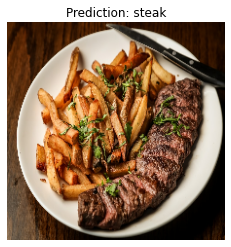

In [ ]:
pred_and_plot(model_7, 'stk1.jpg')

1/1 [==============================] - 0s 83ms/step


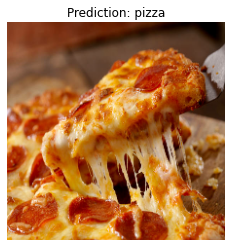

In [ ]:
pred_and_plot(model_7, 'pzz1.jpg')

1/1 [==============================] - 0s 27ms/step


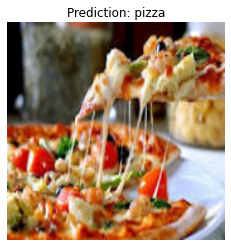

In [ ]:
pred_and_plot(model_7, 'pzz2.jpg')

## Multiclass Image Classification

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the data
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip')
zip_ref.extractall()
zip_ref.close()

--2022-11-29 06:57:55--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 172.217.194.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  16.2MB/s    in 33s     

2022-11-29 06:58:30 (14.9 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

# Walk through the data
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '10_food_classes_all_data'
There are 10 directories and 0 images in '10_food_classes_all_data/train'
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'
There are 1

### Become one with the data

In [ ]:
# Setup the tran and test dirs
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [ ]:
# Getting the classnames
import numpy as np
import pathlib

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
# Visualizing the data
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) 

NameError: ignored

### Preprocess the data

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Rescaling the data
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from dirs and turn it into batches
train_data = train_datagen.flow_from_directory(
    train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical',
)

test_data = test_datagen.flow_from_directory(
    test_dir, target_size=(224, 224)
)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### Create the Model

In [ ]:
# Set the random seed
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

tf.random.set_seed(42)

# Create the model
model_8 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3), activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model
model_8.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics='accuracy')

In [ ]:
# Fitting the model
history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 49s 206ms/step - loss: 2.1530 - accuracy: 0.2003 - val_loss: 2.0515 - val_accuracy: 0.2352
Epoch 2/5
235/235 [==============================] - 47s 199ms/step - loss: 1.9257 - accuracy: 0.3311 - val_loss: 1.8484 - val_accuracy: 0.3556
Epoch 3/5
235/235 [==============================] - 46s 194ms/step - loss: 1.5437 - accuracy: 0.4757 - val_loss: 1.9924 - val_accuracy: 0.3252
Epoch 4/5
235/235 [==============================] - 47s 199ms/step - loss: 0.9616 - accuracy: 0.6804 - val_loss: 2.4887 - val_accuracy: 0.3120
Epoch 5/5
235/235 [==============================] - 49s 209ms/step - loss: 0.4055 - accuracy: 0.8731 - val_loss: 3.4902 - val_accuracy: 0.2932


### Evaluating the model

In [ ]:
# Evaluate on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 11s 142ms/step - loss: 3.4902 - accuracy: 0.2932


[3.490173101425171, 0.29319998621940613]

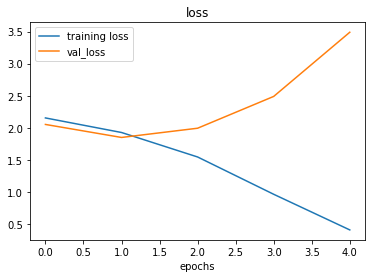

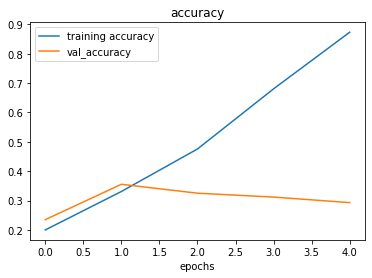

In [ ]:
# Check the loss curves
plot_loss_curves(history=history_8)

The loss curves show that the model_8 is overfitting on the training data

### Adjusting the models hyperparameters

In [ ]:
# Simplifying the current model
model_8.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

In [ ]:
tf.random.set_seed(42)

# Create the model
model_9 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3), activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model
model_9.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics='accuracy')

In [ ]:
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 48s 200ms/step - loss: 2.1078 - accuracy: 0.2472 - val_loss: 1.9782 - val_accuracy: 0.2940
Epoch 2/5
235/235 [==============================] - 52s 223ms/step - loss: 1.7818 - accuracy: 0.3931 - val_loss: 1.8557 - val_accuracy: 0.3604
Epoch 3/5
235/235 [==============================] - 46s 194ms/step - loss: 1.4457 - accuracy: 0.5237 - val_loss: 1.9014 - val_accuracy: 0.3504
Epoch 4/5
235/235 [==============================] - 45s 190ms/step - loss: 1.0014 - accuracy: 0.6825 - val_loss: 2.1362 - val_accuracy: 0.3252
Epoch 5/5
180/235 [=====================>........] - ETA: 8s - loss: 0.5660 - accuracy: 0.8385

In [ ]:
# Checking the loss curves
plot_loss_curves(history_9)

In [ ]:
model_9.summary()

### try using data augmentation to try to fix overfitting

In [ ]:
# Creating an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [ ]:
# New model fit using augemented training data
model_10 = tf.keras.models.clone_model(model_8)

# Compile the cloned models
model_10.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics='accuracy')

In [ ]:
model_10.summary(
    
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [ ]:
model_8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [ ]:
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 137s 548ms/step - loss: 2.2092 - accuracy: 0.1847 - val_loss: 2.0183 - val_accuracy: 0.2816
Epoch 2/5
235/235 [==============================] - 115s 490ms/step - loss: 2.0832 - accuracy: 0.2571 - val_loss: 1.9005 - val_accuracy: 0.3384
Epoch 3/5
235/235 [==============================] - 115s 491ms/step - loss: 2.0103 - accuracy: 0.2943 - val_loss: 1.9364 - val_accuracy: 0.3340
Epoch 4/5
235/235 [==============================] - 116s 493ms/step - loss: 1.9802 - accuracy: 0.3081 - val_loss: 1.8353 - val_accuracy: 0.3552
Epoch 5/5
235/235 [==============================] - 112s 477ms/step - loss: 1.9607 - accuracy: 0.3209 - val_loss: 1.7893 - val_accuracy: 0.3748


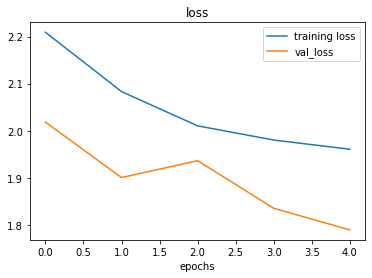

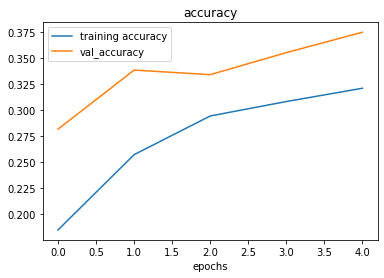

In [ ]:
# Check the loss curves
import matplotlib.pyplot as plt
plot_loss_curves(history_10)

In [ ]:
model_10.evaluate(test_data)

79/79 [==============================] - 11s 139ms/step - loss: 1.7893 - accuracy: 0.3748


[1.7892751693725586, 0.3747999966144562]

### Making a prediction


In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
# Reconfiguring pred and plot
def pred_and_plot(model, filename, class_names=class_names):
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False);

1/1 [==============================] - 0s 20ms/step


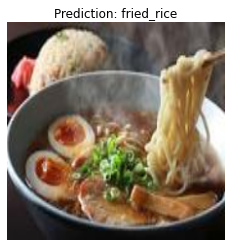

In [ ]:
# Make prediction using model_10
pred_and_plot(model=model_10, filename='rm1.jpg',class_names=class_names)

## Saving and loading the model

In [ ]:
# Saving the model_10
model_10.save('Saved trained model_10')

In [ ]:
# Load in a saved model and evaluate it
loaded_model_10 = tf.keras.models.load_model('Saved trained model_10')

In [ ]:
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 12s 142ms/step - loss: 1.7893 - accuracy: 0.3748


[1.7892751693725586, 0.3747999966144562]